# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

SecondLife, a used car dealership, has started shifting their focus to vintage cars and has been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
Our objectiveis to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### **Loading the data**

In [2]:
data = pd.read_csv('auto-mpg.csv')

### **Data Overview**

- Observations
- Sanity checks




In [3]:
# let's take a quick look at the dataset
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [4]:
# let's take a deeper look at the individual componets in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**    
    398 values
    8 columns

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [6]:
# I suspect that column "car name" will not be useful
# let's see how many unique entries are in this column
# if the value is high, then we may consider dropping
# if the value is low, then we may be able to extract insights from this column
data["car name"].nunique()

305

**Observations:**<br>
Column "car name" contains far too many unique entries to be useful in our analysis
<br>
We should drop this column

In [7]:
# to drop the column:
data1 = data.copy()
data = data.drop(['car name'], axis=1) 
# let's check that the column has been dropped from our new dataset that we'll be working with
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [8]:
# let's check that our copy of the original dataset still contains the column 'car name'
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [9]:
# entries in column 'horsepower' should be int or float
# yet data.info() yields that the entries are categorized as object
# let's first see what the string values in 'horsepower' are and how many entries are strings
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())
# this tells us if string values are made up of digits
# these values could potentially be converted into str or float

hpIsDigit.head()

,horsepower
0,True
1,True
2,True
3,True
4,True


In [10]:
# let's pull only the rows that do not have digits in their 'horsepower' values
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**<br>
6 rows have '?' in column 'horsepower'
<br>
We should treat these values as missing values by replacing '?' with 'np.nan'

In [11]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [12]:
# let's replace the missing values with the median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)

# let's convert column 'horsepower' to float
data['horsepower'] = data['horsepower'].astype('float64')  


In [13]:
# column horsepower should now contain only float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


### **Summary Statistics**

In [14]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Observations:**<br>
Average MPG = 23.51
<br>
Average horsepower = 104.3
<br>
Average weight = 2970.42
<br>
Model year ranges from 1970 to 1982

mpg
Skew : 0.46


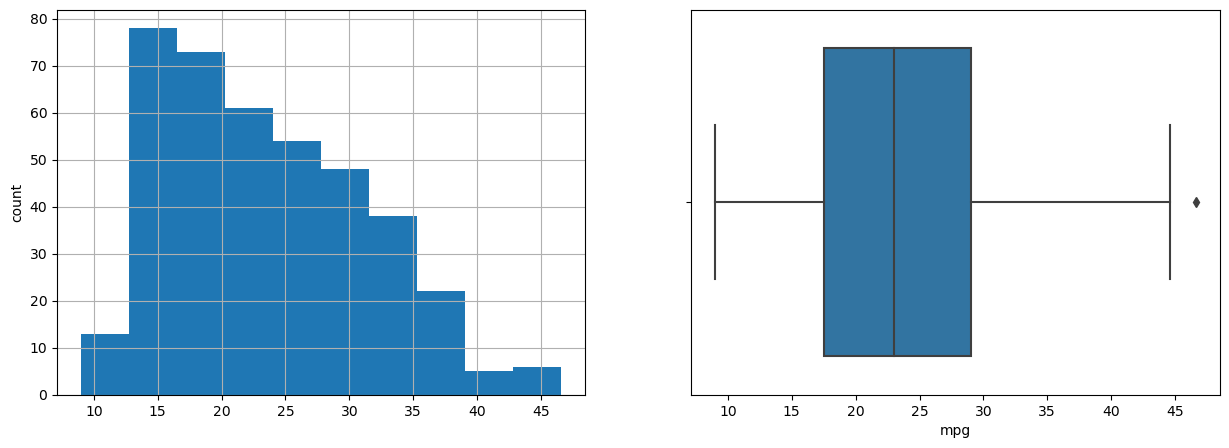

cylinders
Skew : 0.53


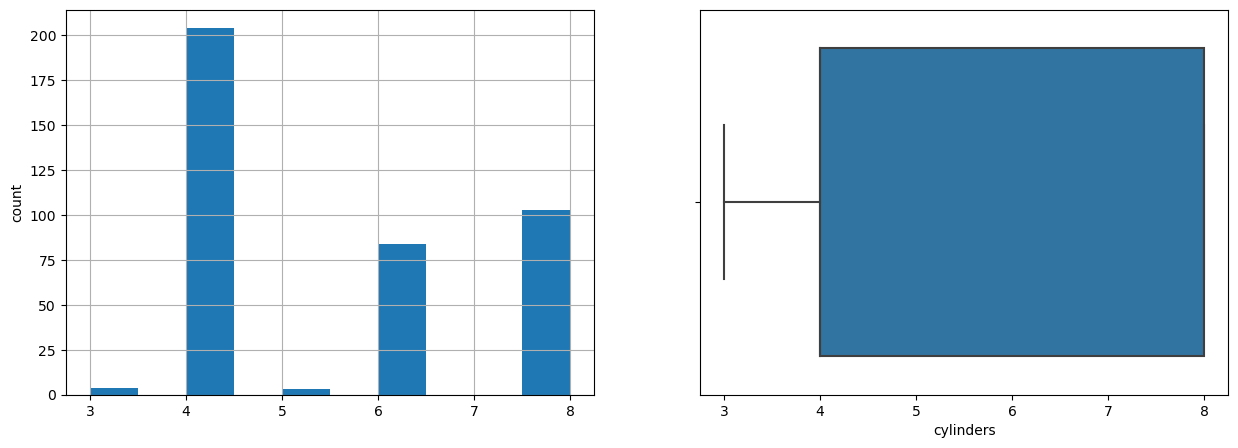

displacement
Skew : 0.72


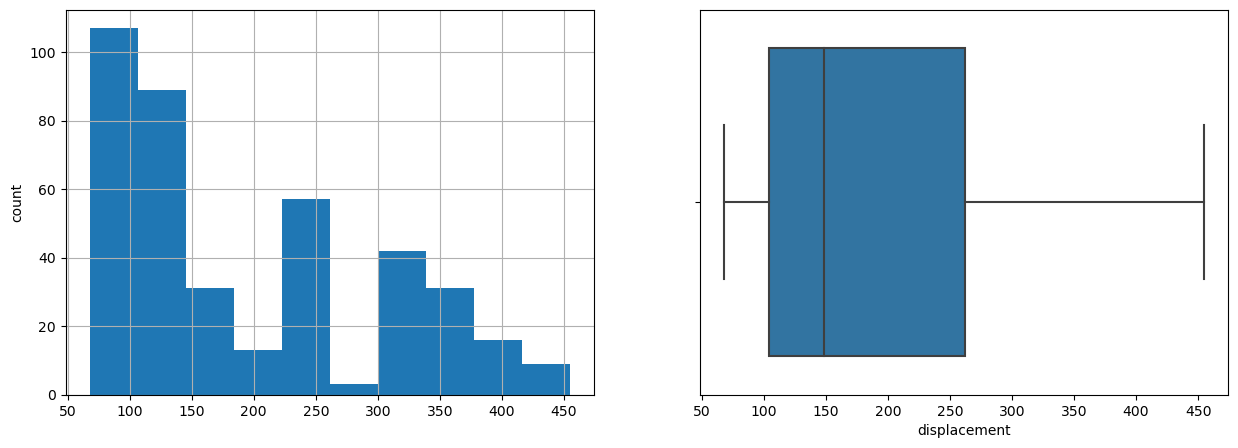

horsepower
Skew : 1.11


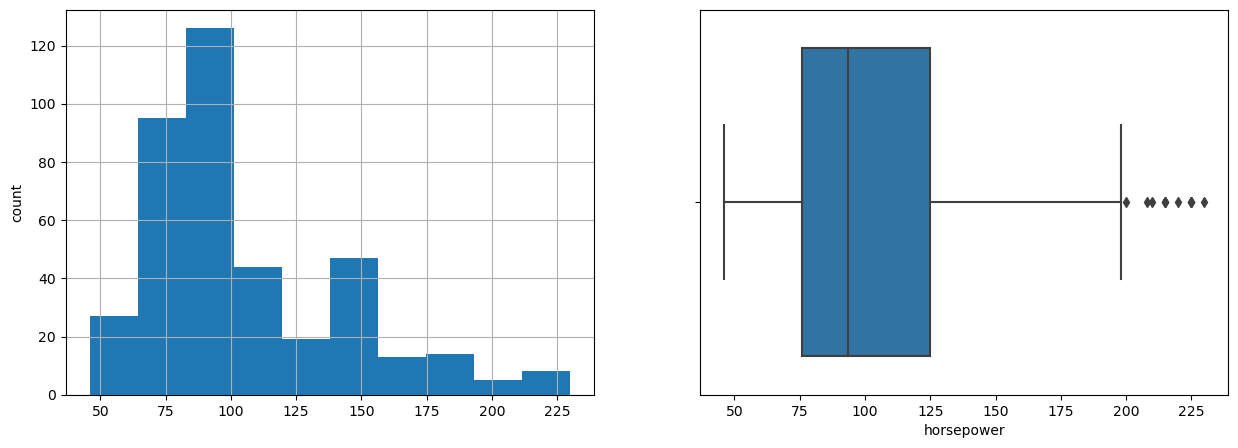

weight
Skew : 0.53


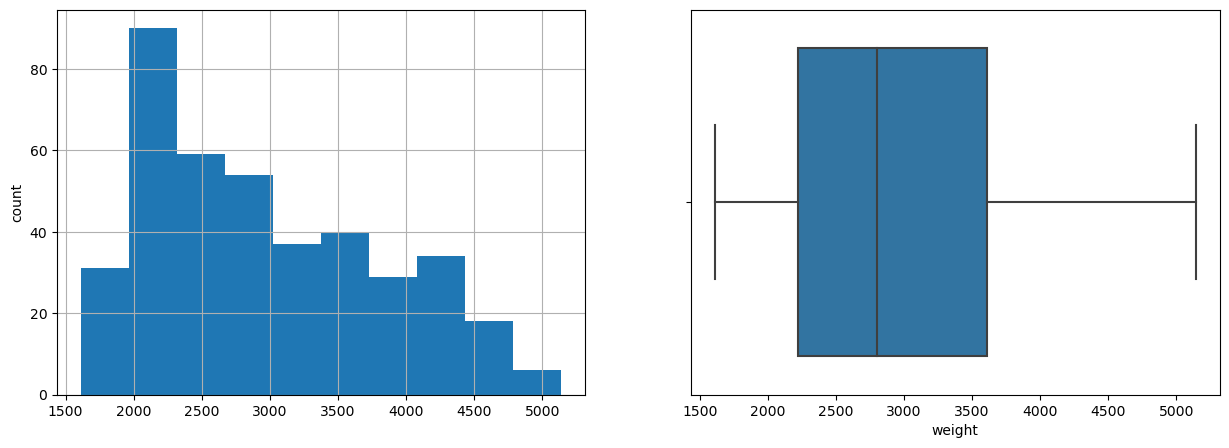

acceleration
Skew : 0.28


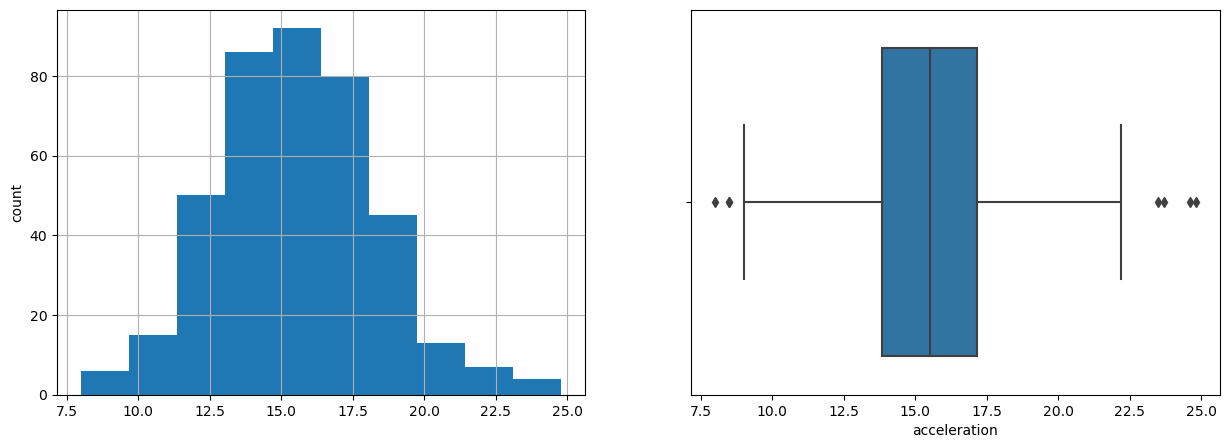

model year
Skew : 0.01


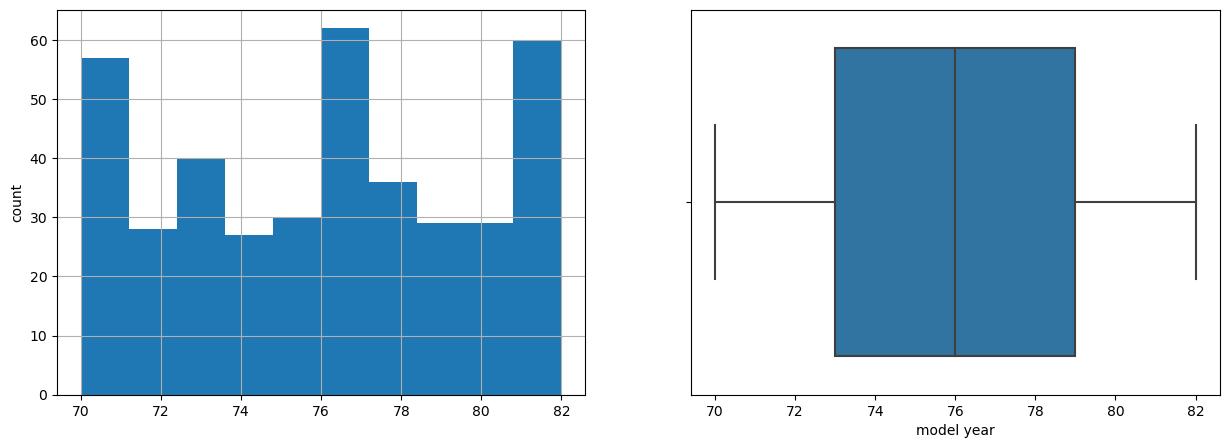

In [15]:
# let's check for outliers
for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,5))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x= data[col])
     plt.show()

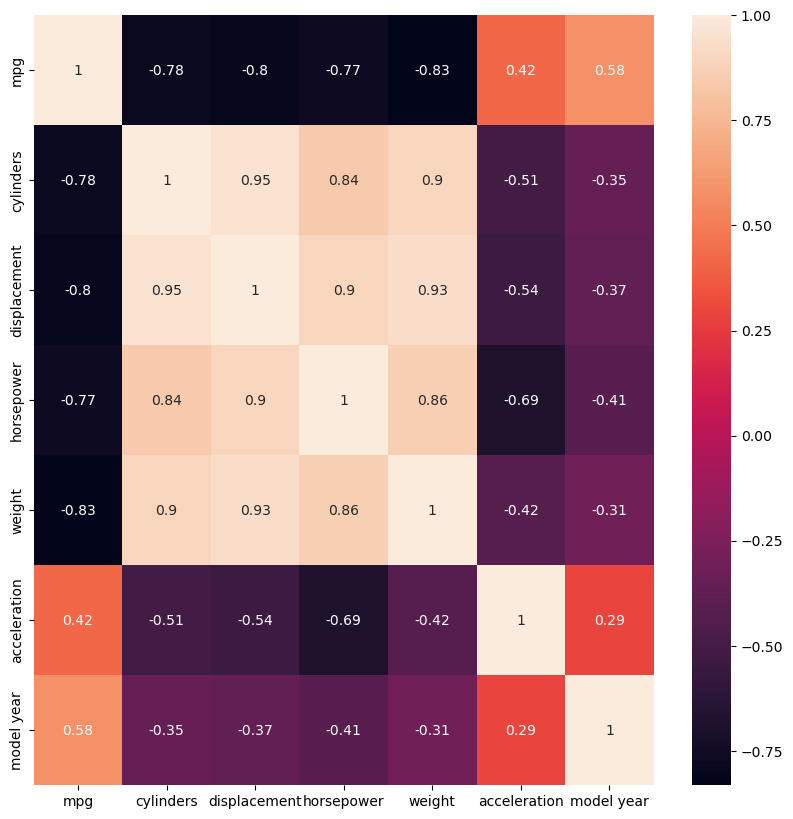

In [16]:
# let's see which of these variable correlate with one another
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**<br>
Weight, displacement, horsepower, and MPG are skewed to the right
<br>
MPG is negatively correlated with horsepower (-0.77), displacement (-0.8), and cylinders (-0.78)
<br>
Acceleration and horsepower are negatively correlated (-0.69)
<br>
Weight is positively correlated with horsepower (0.86), displacement (0.93), and cylnders (0.9)
<br>
MPG and model year are positively correlated (0.58)

### **Scaling the data**

In [17]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [18]:
# we want to generate 1 principal component
n=data_scaled.shape[1]

# let's find principal components for the data with 1 random state
pca = PCA(n_components=n,random_state = 1)

# let's apply the PCA function on scaled data
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))
exp_var = pca.explained_variance_ratio_

In [19]:
# #Defining the number of principal components to generate 
# n=data_scaled.shape[1]

# #Finding principal components for the data
# pca = PCA(n_components=n,random_state = 1) #Applying the PCA algorithm with random state = 1
# data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fitting and transforming the pca function on scaled data

# #The percentage of variance explained by each principal component
# exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

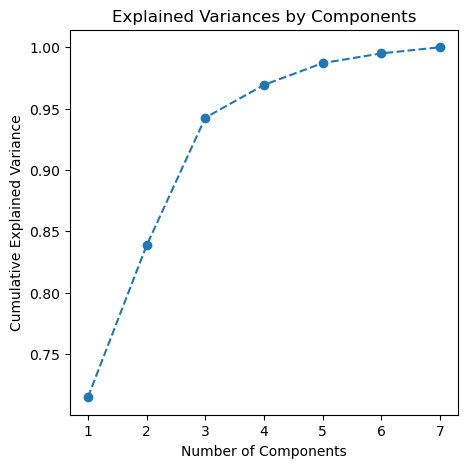

In [20]:
# PCA is sometimes best understood visually
plt.figure(figsize = (5,5))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [21]:
# let's find the least number of components needed to explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:**<br>
With just 3 components we can explain at least 90% of the variation
<br>
This means we cn substantially reduce the number of dimentions 

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [22]:
pca.components_

pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
mpg,-0.40,-0.21,-0.26,0.75
cylinders,0.42,-0.19,0.14,0.48
displacement,0.43,-0.18,0.10,0.29
horsepower,0.42,-0.09,-0.17,-0.03
weight,0.41,-0.22,0.28,-0.11
acceleration,-0.28,0.02,0.89,0.13
model year,-0.23,-0.91,-0.02,-0.30


In [23]:
# I chose -0.40 and 0.40 simply from estimating from the above table
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
mpg,-0.400000,-0.210000,-0.260000,0.750000
cylinders,0.420000,-0.190000,0.140000,0.480000
displacement,0.430000,-0.180000,0.100000,0.290000
horsepower,0.420000,-0.090000,-0.170000,-0.030000
weight,0.410000,-0.220000,0.280000,-0.110000
acceleration,-0.280000,0.020000,0.890000,0.130000
model year,-0.230000,-0.910000,-0.020000,-0.300000


**Observations:**<br>
PC1 yielded high coefficients for cylinders, displacement, horsepower, and weight
<br>
PC1 yielded a low coefficient for MPH
<br>
This could be explained if we consider two categories of cars: heavy and small
<br>
It could then be said that PC1 is a better at describing heavy cars since cylinders, displacement, horsepower, and weight are associated with heavier or larger cars
<br> <br>
PC2 has a low coefficient or model year
<br>
Based on this, I infer that PC2 is a better at describing older cars
<br> <br>
PC3 has a low coefficient for acceleration 

#### **Visualize the data in 2 dimensions using the first two principal components**



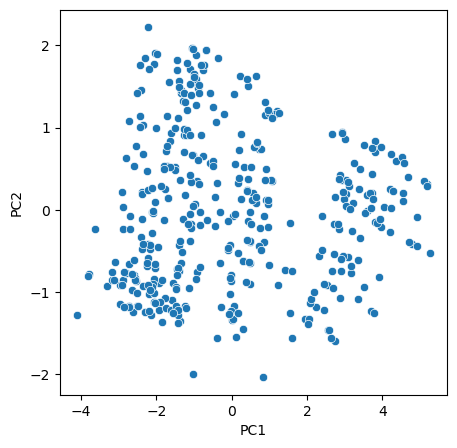

In [24]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Text(0, 0.5, 'PC2')

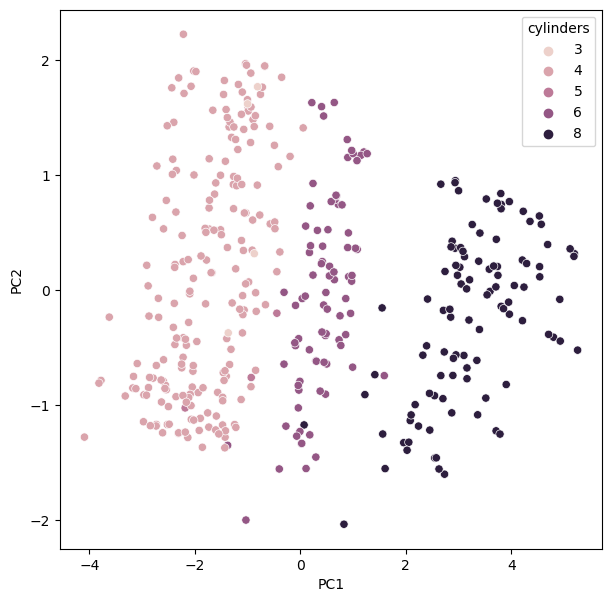

In [25]:
# we can attain some insights from coloring the scatter plot
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y = 1, data=df_concat, hue = 'cylinders')
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**<br>
Three clear cluster are found with little overlap
<br>
These clusters are based on the column 'cylinder': 3-5 cylinders, 6 cylinders, and 8 cylinders

## **t-SNE**

In [26]:
# let's apply the t-SNE algorithym and set 1 random state
tsne = TSNE(n_components = 2, random_state = 1)
# next,let's apply this to scaled data
data_tsne = tsne.fit_transform(data_scaled) 

In [27]:
data_tsne.shape

(398, 2)

In [28]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])
data_tsne.head()

,Component 1,Component 2
0,-23.104227,-30.228313
1,-24.950542,-29.500071
2,-24.119961,-30.136980
3,-23.673611,-29.754570
4,-23.841228,-30.443615


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

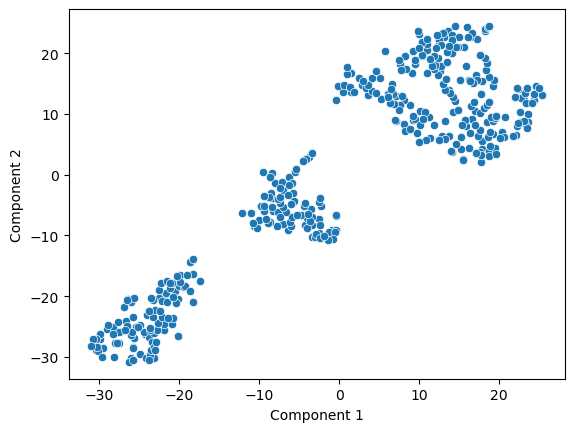

In [29]:
# like with PCA, sometimes insights are better attained when data is demonstrated visually
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

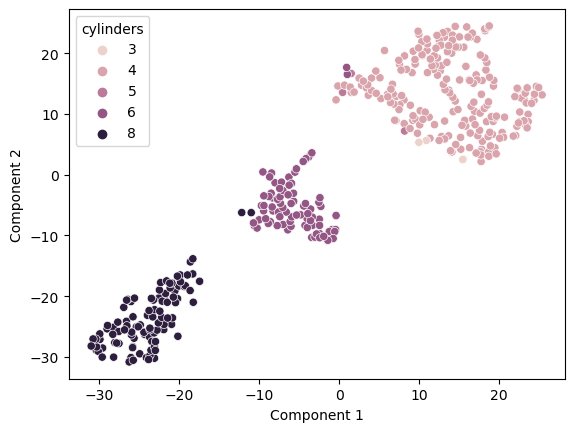

In [30]:
# though we can clearly see three clusters, let's color our plot by number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**<br>
Three cluster are again found this time with even less overlap
<br>
t-SNE seems to be a better method to use since the clusters are more clearly observable

In [31]:
# let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component > 0) and (second_component > 0): 
        return 'group_1'
    if (first_component >- 20 ) and (second_component >- 10):
        return 'group_2'
    else: 
        return 'group_3'

In [32]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

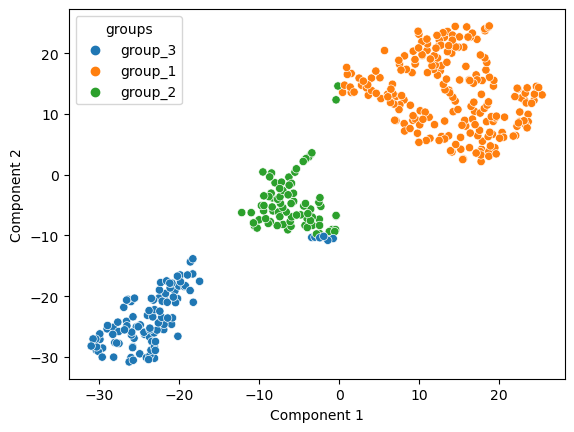

In [33]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

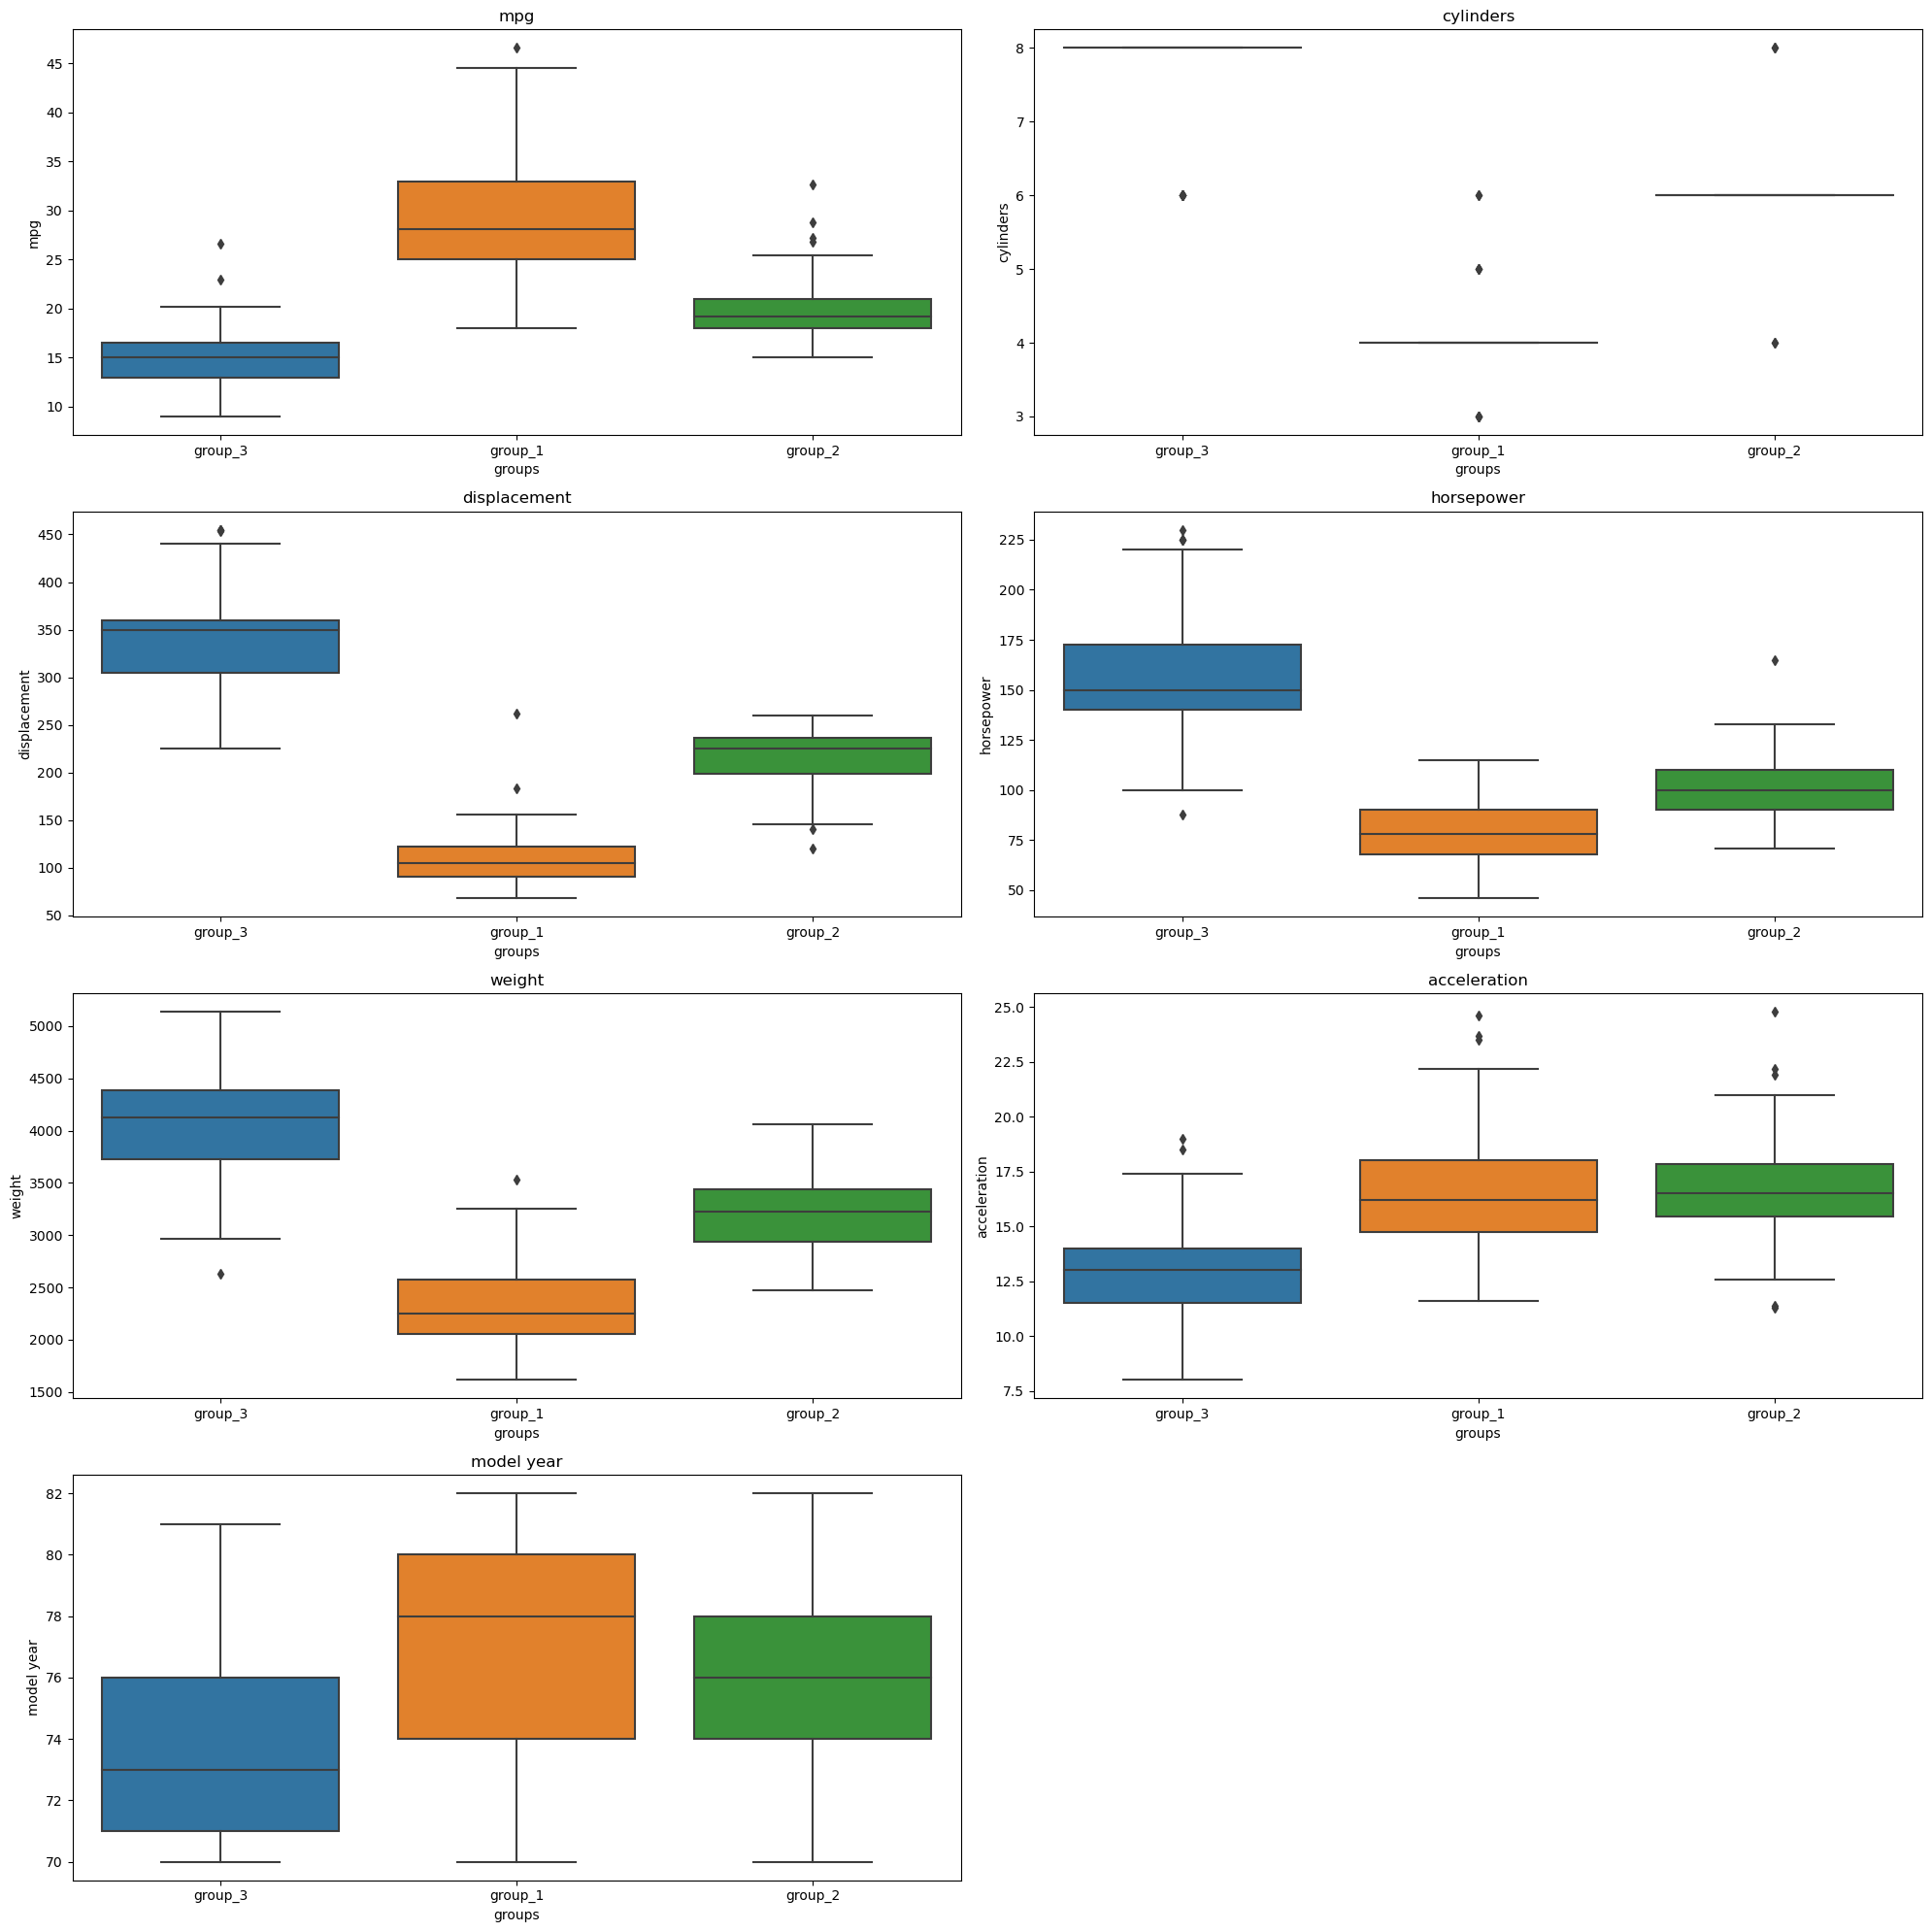

In [34]:
# create boxplot with groups on the x-axis and variable on the y-axis
data['groups'] = data_tsne['groups'] 

all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x = data['groups'], y = data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**<br>
The three groups are distinct across every metric measured except model year and acceleration
<br>
There is slight overlap between horse power of groups 1 and 2 that ought to be explored

## **Actionable Insights and Recommendations**

**Insights and recommendations here:** <br>
We successfully found 3 distinct groups.
<br>
It is likely cars are grouped by their size, power, and mpg, all three of which are positively correlated with each other. 
<br>
**Group 1** describes fuel efficient cars as they have higher MPG, lower wieght, lower horsepower, and lower cylinders than groups 2 and 3
<br>
**Group 2** describes mid ranged cars as their mpg, horsepower, and cylinders lay between group 1 and 3's
<br>
**Group 3** describes large/heavy cars as they have lower MPG, higher wieght, higher horsepower, and higher cylinders than both groups 1 and 2
<br>
<br>
Going forward, I recommend developing unique sales techniques for each of the 3 groups as they all have distint features, drawbacks for consumers, and selling points.